#### This Notebook will  <li>draw the Chorogrid Map of the United States showing variation of submissions differening from the population estimates  <li> draw the normalized distribution of these values

In [3]:
# imports
from chorogrid import Colorbin, Chorogrid
import pandas as pd

Read in the data and slice for the state abbreviation and variation from population estimate

In [4]:
df = pd.read_csv('FCC_pop_comments_perc2.csv')

In [32]:
df = df[['abbreviation','diff_perc_pop_comments']]
df.head()

,abbreviation,diff_perc_pop_comments
37,OR,-0.89
46,VA,-0.72
47,WA,-0.55
21,MA,-0.46
30,NJ,-0.41


Set the values for the color range and fenceposts for the values that will trigger the different colors.

In [70]:
#Set the fenceposts for the colors and specify the color range

mycolors = ['#b35806', '#f1a340', '#fee0b6', '#D3D3D3','#d8daeb', '#998ec3', '#542788']

mybin = Colorbin(df['diff_perc_pop_comments'], mycolors, proportional=True, decimals=None)
mybin.set_decimals(2)
mybin.recalc(fenceposts=True)

mybin.fenceposts = [-2.00,-0.70,-0.36,-0.1,0.1,0.36,.70,2.00]
#mybin.recalc(fenceposts=True)

mybin.recalc(fenceposts=False) # if this were true, the fenceposts would be changed back to what they were originally
#mybin.count_bins()

mybin.calc_complements(0.5, '#e0e0e0', '#101010')

Set the values to the parameters that will be used by the Chorogrid function.

In [72]:
states = list(df['abbreviation'])
colors_by_state = mybin.colors_out
font_colors_by_state = mybin.complements
legend_colors = mybin.colors_in
legend_labels = mybin.labels

Read in the design and description files for creating the grid map of the USA 

In [12]:
_ = pd.read_csv('usa_states.csv')

abbrev                                                                   AK
full_name                                                            Alaska
long_abbrev                                                           Alas.
FIPS                                                                      2
pop                                                                  710231
sqmi                                                                 663267
map_path                  m 135.58488,358.02208 -0.24846,65.59232 1.2422...
map_fill_default                                                          2
map_label_x                                                         99.7626
map_label_y                                                         398.173
map_label_text_anchor                                                middle
map_label_line_path                                                     NaN
altmap_path               m 151.26632,459.09682 -0.31386,83.24785 1.5692...
square_x    

In [13]:
with open('usa_states_column_descriptions.txt') as f:
    print(f.read())

abbrev                       Postal abbreviation for 50 states and D.C.
full_name                    Full name
long_abbrev                  Abbreviation, based on but not identical to recommendations of Associated Press
FIPS                         Federal Information Processing Standards
pop                          Population in 2013
sqmi                         Area in square miles

map_path                     SVG path for geographic map
map_fill_default             Number, 1-4, so that no states sharing a border will have same fill
map_label_x                  X-coordinate for map label, e.g. state name
map_label_y                  Y-coordinate for map label
map_label_text_anchor        Text anchor (start, middle, end) for label
map_label_line_path          Path for line connecting state and label, if applicable

altmap_path                  Alternate SVG path, without labels

square_x                     Horizontal position of square grid
square_y                     Vertical pos

Plot out the grid map of the USA with the variations in color indicating how far from the mean of 0 the values for each state are. The hue intensities indicate less than 1, more than 1 and more than 2 standard deviations from the mean. Gray indicates very close to the mean.

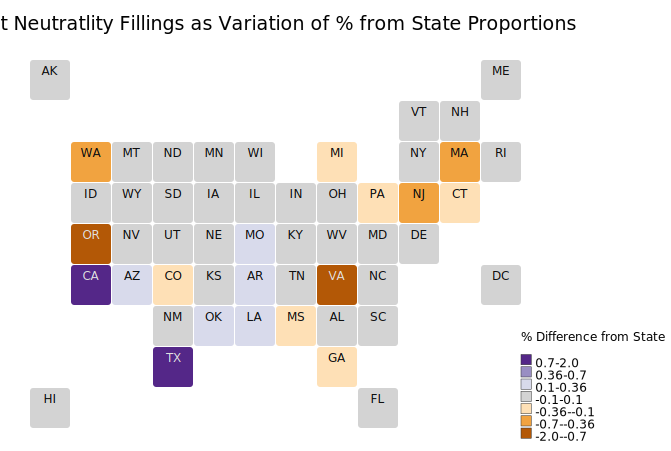

In [73]:
cg = Chorogrid('usa_states.csv', states, colors_by_state)
cg.set_title('Net Neutratlity Fillings \n as Variation of % from State Proportions', font_dict={'font-size': 19})
cg.set_legend(legend_colors, legend_labels, title='% Difference from State')
cg.draw_squares(x_column='altsquare_x', y_column='altsquare_y', spacing_dict={'margin_right': 150},
                font_colors=font_colors_by_state)
cg.done(show=True,save_filename='chorogrid proportions')

Plot out the normalized distribution of the values from the data, the markers for the standard deviations and the annotations for the extreme values.

Text(0.5,0,'Variation from Population Proportion')

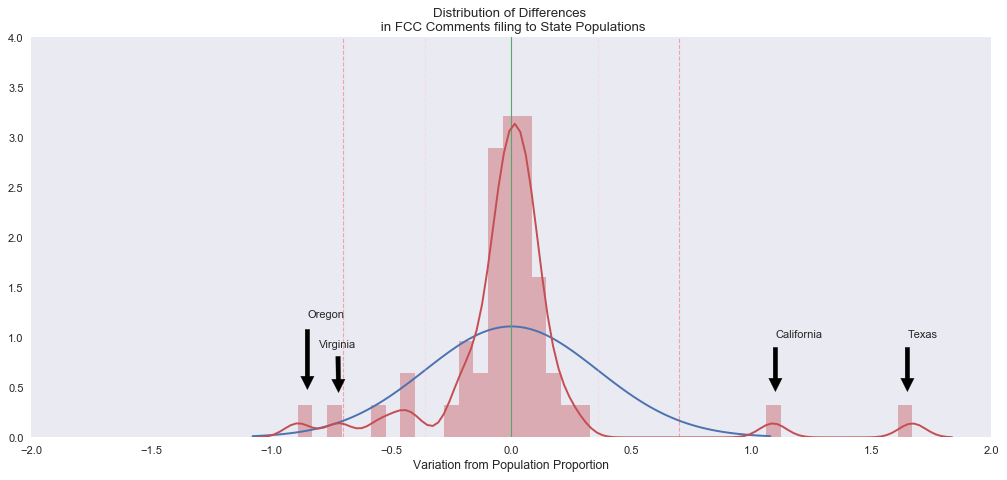

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import numpy as np
import math
%matplotlib inline

mu = df['diff_perc_pop_comments'].mean() # 0.000196
variance = df['diff_perc_pop_comments'].var() #0.1292
sigma = math.sqrt(variance) #0.359
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)


plt.figure( figsize=(12,5), dpi=80)
plt.plot(x,mlab.normpdf(x, mu, sigma))
plt.title('Distribution of Differences \n in FCC Comments filing to State Populations')


df.sort_values('diff_perc_pop_comments', inplace=True)
plt.plot([0, 0], [0, 4.0], linewidth=1)
plt.plot([0.7, 0.7], [0, 4.0], linewidth=1,linestyle='--',alpha=0.3,color='red')
plt.plot([-0.7, -0.7], [0, 4.0], linewidth=1,linestyle='--',alpha=0.3,color='red')
plt.plot([0.36, 0.36], [0, 4.0], linewidth=1,linestyle='--',alpha=0.3,color='pink')
plt.plot([-0.36, -0.36], [0, 4.0], linewidth=1,linestyle='--',alpha=0.3,color='pink')
plt.ylim(0, 4.0)
plt.xlim(-2.0, 2.0)
plt.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
plt.grid(False)
plt.annotate('Texas', xy=(1.65, 0.4), xytext=(1.65, 1),arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate('California', xy=(1.1, 0.4), xytext=(1.1, 1),arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate('Oregon', xy=(-.85, 0.4), xytext=(-.85, 1.2),arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate('Virginia', xy=(-.72, 0.4), xytext=(-.8, .9),arrowprops=dict(facecolor='black', shrink=0.1))

ax = sns.distplot(df['diff_perc_pop_comments'],bins=42)
plt.xlabel('Variation from Population Proportion')
#ax.fill_between(x2,y2, color="blue", alpha=0.3)

